In [1]:
''' Importing the libraries'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import pickle

In [2]:
''' Reading the csv file '''
data = pd.read_csv("jewellery.csv") 

In [3]:
''' Printing the 1st 5 rows '''
data.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [4]:
''' Printing the datatypes '''
data.dtypes

Age                int64
Income             int64
SpendingScore    float64
Savings          float64
dtype: object

In [5]:
''' Printing the shape of the dataset'''
data.shape

(505, 4)

In [7]:
''' Checking for null values '''
data.isnull().sum()


Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64

In [9]:
df= pd.DataFrame(data['Age'])
df['SpendingScore']=data['SpendingScore']
df.head()

,Age,SpendingScore
0,58,0.791329
1,59,0.791082
2,62,0.702657
3,59,0.765680
4,87,0.348778


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


sse 1: 294068.061608074
sse 2: 71416.0608191777
sse 3: 9081.657723926599
sse 4: 5854.062913586266
sse 5: 4378.652689331721
sse 6: 3237.1748540393664
sse 7: 2173.6368801434273
sse 8: 1862.7799722758687
sse 9: 1547.7026518846399


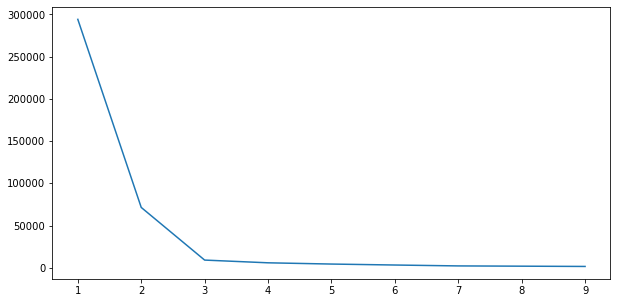

In [18]:
''' k-means elbow curve'''
    
sse=[]
no_of_cluster= []

for i in range(1,10): 
    km = KMeans(n_clusters=i)
    cluster_predicted = km.fit(df)
    no_of_cluster.append(i) 
    sse.append(cluster_predicted.inertia_)
    print(f'sse {i}: {cluster_predicted.inertia_}')
plt.figure(figsize=(10,5))
plt.plot(no_of_cluster, sse)

In [19]:
'''Initializing K-means cluster as 3'''
km = KMeans(n_clusters=3)
print(km)

KMeans(n_clusters=3)


In [20]:
''' Fitting and predicting the values'''
predict = km.fit_predict(df)
print(predict)

[2 2 2 2 1 0 2 1 1 1 1 0 0 0 2 1 2 1 1 1 0 1 2 1 1 0 0 2 1 2 2 2 1 2 0 2 1
 2 0 0 2 1 0 2 2 0 1 0 0 2 1 0 0 1 2 1 0 1 1 1 1 1 1 2 2 2 1 0 0 2 2 0 1 1
 0 2 0 2 2 0 2 1 2 1 1 0 0 2 2 2 2 2 0 1 2 0 0 2 2 0 0 0 0 0 0 1 1 0 0 2 1
 0 2 0 0 0 2 0 0 1 0 1 1 1 0 1 2 1 2 2 0 2 0 2 0 1 1 0 2 0 1 2 2 0 2 0 2 1
 2 1 2 0 1 2 1 1 0 2 1 2 0 1 2 0 1 0 1 2 0 2 1 2 0 2 1 2 2 1 1 1 2 2 0 0 0
 1 0 2 2 2 0 1 2 2 2 1 0 0 1 1 1 0 2 0 2 0 2 1 0 2 1 1 1 1 2 1 0 0 0 1 2 2
 0 1 0 0 0 2 2 1 2 2 1 2 2 2 0 2 0 0 0 2 2 2 1 2 0 1 0 0 0 1 2 0 1 1 0 0 2
 2 1 2 2 1 2 1 0 0 2 0 1 2 1 1 0 2 1 1 2 2 1 0 0 1 0 1 1 0 1 1 1 0 2 0 0 2
 0 1 1 0 2 0 1 2 0 0 2 1 0 0 1 1 1 2 1 0 2 2 1 0 1 0 1 0 1 1 0 1 0 2 0 2 2
 0 0 1 1 0 0 0 1 0 1 1 2 2 2 1 1 0 0 1 0 1 2 0 0 1 2 1 0 2 1 1 2 1 0 2 1 0
 0 2 1 1 1 1 1 0 0 1 2 0 2 1 1 1 2 1 1 2 1 1 0 1 2 0 0 0 2 1 0 2 2 2 1 0 0
 0 2 0 2 2 0 0 1 0 0 0 1 2 1 0 1 0 2 2 1 1 0 1 0 2 2 0 2 1 2 0 2 1 2 1 0 0
 0 0 0 0 1 1 2 0 2 0 0 1 0 0 0 1 0 0 2 0 1 1 0 2 0 2 2 0 2 2 2 1 0 0 2 2 2
 1 0 1 1 1 1 0 1 1 1 2 2 

In [21]:
''' Finding the silhouette score'''

score = silhouette_score(df, km.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.827


In [22]:
'''Printing the centroids of each column'''

center = km.cluster_centers_
print(center)

[[ 3.03352273e+01  4.76677695e-01  2.00000000e+00]
 [ 8.75174419e+01  2.90948373e-01  1.00000000e+00]
 [ 5.99554140e+01  7.71518368e-01 -2.22044605e-16]]


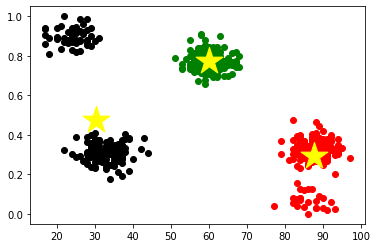

In [23]:
'''Visualizing the age and income with its respective clusters'''
df['cluster'] = predict
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age, df1.SpendingScore, color='black')
plt.scatter(df2.Age, df2.SpendingScore, color='red')
plt.scatter(df3.Age, df3.SpendingScore, color='green')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='yellow', marker='*', s=800)

In [24]:
pickle.dump(km,open("kmeans.pkl","wb"))